In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
from matplotlib import rc
rc('text',usetex=False)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':8})
rc('mathtext',fontset='cm')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'figure.figsize': (5,3.5)}

In [4]:
import numpy as np
from numpy import sqrt,log,array as ar
import numpy.linalg as la
import cvxpy as cvx
from helper import *
from cd.model.utility import LipschitzExpUtility as leu, RiskNeutralUtility as rnu
from cd.model.distrs import RademacherDistribution,UniformDistribution
import cd.model.synth_data as synth
import scaler
from itertools import product

## Sous optimalité

NameError: name 'ns' is not defined

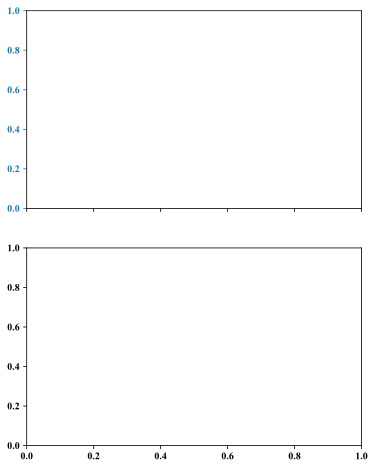

In [5]:
plt.figure(figsize=(10,20))
fig,axarr = plt.subplots(2,sharex=True,figsize=(6,8))
pltu1,pltce1 = axarr[0],axarr[1]

# Utility
pltu1.tick_params('y',colors='C0')

pltu1.plot(ns,error[:,0],'C0-s',markevery=6,ms=4,label='$\mu=1$')
pltu1.plot(ns,error[:,1],'C0-o',markevery=6,ms=4,label='$\mu=1/2$')
pltu1.legend();
pltu1.set_title("a) Utilit\\'e")

pltu1.axis(ymin=0)

# CE
pltce1.tick_params('y',colors='C0')
pltce1.plot(ns,errorce[:,0],'C0-s',markevery=6,ms=4,label='$\mu=1$')
pltce1.plot(ns,errorce[:,1],'C0-o',markevery=6,ms=4,label='$\mu=1/2$')
pltce1.legend();
pltce1.set_title("a) Utilit\\'e")


pltce1.set_title("b) \\'Equivalent certain")
pltce1.set_xlabel('$(n,\lambda)$')

pltce1.axis(ymin=0)

yo = pltce1.get_xticks().tolist()
yo = ["$(0,\infty)$"] + ["(%d, %0.3f)" % (n,0.5*sqrt(10/n)) for n in yo[1:]]
pltce1.set_xticklabels(yo)

# plt.savefig('fig/avrisk_solamb.pdf',bbox_inches='tight',pad_inches=0)

plt.show();



## Loi de marché

In [6]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes,zoomed_inset_axes

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [7]:
Xs = [RademacherDistribution(),RademacherDistribution()]
R = RademacherDistribution()
M = synth.GaussianMarket(Xs,R,corr_vector=[1/sqrt(3),1/sqrt(3)])


In [8]:
X,r = M.sample(1_000_000)

In [9]:
sig = M.Σ

In [10]:
t = np.random.multivariate_normal([0,0,0],sig,500)

In [11]:
X0 = t[:,0]
X1 = t[:,1]
r = t[:,2]

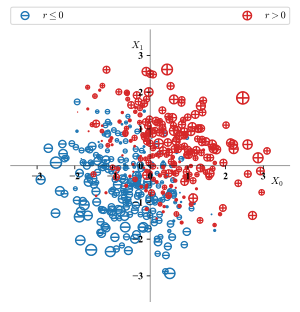

In [12]:
fig,ax = plt.subplots(1,figsize=(5,5))

ax.scatter(X0[r<=0],X1[r<=0],c='C0',marker='$\ominus$',s=-50*r[r<=0],label='$r\leq0$')
ax.scatter(X0[r>=0],X1[r>=0],c='C3',marker='$\oplus$',s=50*r[r>=0],label='$r>0$')

ax.spines['left'].set_position('zero')
ax.spines['left'].set_alpha(0.5)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_color('none')

ax.axis(ymax=3.7,ymin=-3.7,xmin=-3.7,xmax=3.7)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax.annotate('$X_0$',xy=(3.2,-0.5))
ax.annotate('$X_1$',xy=(-0.5,3.2));

In [13]:
fig,ax = plt.subplots(1,figsize=(5,5))
#ax.scatter(X0[r>=0],X1[r>=0],c=r[r>=0],s=15,cmap='Blues')
#ax.scatter(X0[r<=0],X1[r<=0],c=-r[r<=0],s=15,cmap='Oranges')

ax.scatter(X0[r<=0],X1[r<=0],c='C0',marker='$\ominus$',s=-50*r[r<=0],label='$r\leq0$')
ax.scatter(X0[r>=0],X1[r>=0],c='C3',marker='$\oplus$',s=50*r[r>=0],label='$r>0$')

ax.spines['left'].set_position('zero')
ax.spines['left'].set_alpha(0.5)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_color('none')

ax.axis(ymax=3.7,ymin=-3.7,xmin=-3.7,xmax=3.7)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax.annotate('$X_0$',xy=(3.2,-0.5))
ax.annotate('$X_1$',xy=(-0.5,3.2));

r00 = r[(X0>0) * (X1>0)]
r01 = r[(X0<0) * (X1>0)]
r10 = r[(X0>0) * (X1<0)]
r11 = r[(X0<0) * (X1<0)]

d = {0:r00,1:r01,2:r11,3:r10}
for l in range(4):
    inax = zoomed_inset_axes(ax,1,loc=l+1)
    inax.bar(0.3,sum(d[l]>0)/len(d[l]),width=0.3,color='C3')
    inax.bar(-0.3,sum(d[l]<0)/len(d[l]),width=0.3,color='C0')
    inax.set_xticks([-0.3,0.3])
    inax.set_yticks([])
    inax.set_xticks([-0.3,0.3])
    inax.set_xticklabels([-1,1])
    inax.axis(ymax=1,xmin=-0.6,xmax=0.6)
    inax.spines['left'].set_color('none')
    inax.spines['top'].set_color('none')
    inax.spines['right'].set_color('none')

#plt.savefig('fig/copula.pdf',bbox_inches='tight',pad_inches=0)
    

## Risque de généralisation et aversion au risque

In [13]:
us = [rnu(),leu(1),leu(0.25)]
p = 2
R = RademacherDistribution()
Xs = [RademacherDistribution() for _ in range(p)]

In [14]:
M = synth.GaussianMarket(Xs,R)
t_true = M.sample_t(5_000)

In [15]:
m = 150
ns = np.arange(10,151)
ts = create_sample(t_true,n=max(ns),m=m)

In [16]:
error = np.zeros((len(ns),len(us)))
errorce = np.zeros((len(ns),len(us)))
for i,n in enumerate(ns):
    if i%5 == 0: print(i)
    t = ts[:,:n]
    for j,u in enumerate(us):
        qs = solve(t,u,lamb=1)
        inerror = in_error(qs,u,t,lamb=1)
        outerror = out_error(qs,u,t_true,lamb=1)
        error[i,j] = np.percentile(inerror - outerror,95)
        errorce[i,j] = np.percentile(u.inverse(inerror) - u.inverse(outerror),95)

0


ValueError: Incompatible dimensions ((10, 2), 1) (2, 1)

In [5]:
fig,axarr = plt.subplots(2,figsize=(6,8))
fig.subplots_adjust(hspace=.3)
pltu,pltce = axarr[0],axarr[1]

# Utility
pltu.plot(ns,error[:,0],'C0',label='$\mu=\infty$')
pltu.plot(ns,error[:,1],'C0-s',markevery=8,ms=4,label='$\mu=1$')
pltu.plot(ns,error[:,2],'C0-o',markevery=8,ms=4,label='$\mu=1/2$')
pltu.legend();
pltu.set_title("a) Utilité")
pltu.set_xlabel('$n$')
pltu.set_ylabel('Erreur de généralisation (util)')
pltu.set_xticks(ns[::10])

# CE
pltce.plot(ns,errorce[:,0],'C0',label='$\mu=\infty$')
pltce.plot(ns,errorce[:,1],'C0-s',markevery=8,ms=4,label='$\mu=1$')
pltce.plot(ns,errorce[:,2],'C0-o',markevery=8,ms=4,label='$\mu=1/2$')
pltce.legend();
pltce.set_xticks(ns[::10])

pltce.set_title("b) Équivalent certain")
pltce.set_xlabel('$n$')
pltce.set_ylabel('Erreur de généralisation (rendement)')

# plt.savefig('fig/avrisk_gen.pdf',bbox_inches='tight',pad_inches=0)


NameError: name 'ns' is not defined

NameError: name 'ns' is not defined

## Statistiques d'ordre

In [0]:
from scipy.optimize import minimize,curve_fit

In [0]:
u = leu(1)
p = 2
R = RademacherDistribution()
Xs = [RademacherDistribution() for _ in range(p)]

In [0]:
M = synth.GaussianMarket(Xs,R)
t_true = M.sample_t(5_000)

In [0]:
m = 100
ns = np.arange(10,151)
ts = create_sample(t_true,n=max(ns),m=m)

In [0]:
error0 = np.zeros(len(ns))
error25 = np.zeros(len(ns))
error50 = np.zeros(len(ns))
error75 = np.zeros(len(ns))
error100 = np.zeros(len(ns))

errorce0 = np.zeros(len(ns))
errorce25 = np.zeros(len(ns))
errorce50 = np.zeros(len(ns))
errorce75 = np.zeros(len(ns))
errorce100 = np.zeros(len(ns))

for i,n in enumerate(ns):
    if i%5 == 0: print(i)
    t = ts[:,:n]
    qs = solve(t,u,lamb=1)
    inerror = in_error(qs,u,t,lamb=1)
    outerror = out_error(qs,u,t_true,lamb=1)
    error = inerror - outerror
    errorce = u.inverse(inerror) - u.inverse(outerror)

    error0[i],error25[i],error50[i],error75[i],error100[i] = \
        [np.percentile(error,pc) for pc in [0,25,50,75,100]]

    errorce0[i],errorce25[i],errorce50[i],errorce75[i],errorce100[i] = \
        [np.percentile(errorce,pc) for pc in [0,25,50,75,100]]


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140


In [0]:
fig,ax = plt.subplots(2,figsize=(6,8))
fig.subplots_adjust(hspace=.3)
pltu,pltce = ax

pltu.plot(ns,error100,'C0:',label='Erreur maximale')
pltu.plot(ns,error75,'--',color='#5a788e',label='75e percentile d\'erreur')
pltu.plot(ns,error50,'#787878',label='Erreur médiane')
pltu.plot(ns,error25,'--',color='#5a5a5a',label='25e percentile d\'erreur')
pltu.plot(ns,error0,'k:',label='Erreur minimale')
pltu.set_xticks(ns[::10])
pltu.set_xlabel('$n$')
pltu.set_ylabel('Erreur de généralisation (util)')
pltu.legend()
pltu.set_title("a) Utilité")

pltce.plot(ns,errorce100,'C0:',label='Erreur maximale')
pltce.plot(ns,errorce75,'--',color='#5a788e',label='75e percentile d\'erreur')
pltce.plot(ns,errorce50,'#787878',label='Erreur médiane')
pltce.plot(ns,errorce25,'--',color='#5a5a5a',label='25e percentile d\'erreur')
pltce.plot(ns,errorce0,'k:',label='Erreur minimale')
pltce.set_ylabel('Erreur de généralisation (rendement)')
pltce.set_xticks(ns[::10])
pltce.legend()
pltce.set_xlabel('$n$')
pltce.set_title("b) Équivalent certain")

# plt.savefig('fig/genstats.pdf',bbox_inches='tight',pad_inches=0)


In [0]:
def order2(x,a,k,b):
    return a*x**k + b

In [0]:
errors = [error100,error75,error50,error25,error0]
names = ['Erreur maximale','75\ieme percentile d\'erreur','Erreur médiane','25\ieme percentile d\'erreur','Erreur minimale']
for i,(err,name) in enumerate(zip(errors,names)):
    if i != 4:
        k = -1/2
    else:
        k = 1/2
    opt,cov = curve_fit(order2,ns,err,p0=(1,k,0))
    print("%s & %2.3f & %2.3e\\\\" % (name, opt[1], cov[1,1]))

Erreur maximale & -0.600 & 5.246e-03\\
75\ieme percentile d'erreur & -0.766 & 1.705e-03\\
Erreur médiane & -0.923 & 2.352e-03\\
25\ieme percentile d'erreur & -1.554 & 3.674e-02\\
Erreur minimale & 0.391 & 2.275e-02\\


In [0]:
curve_fit(order2,ns,error0,p0=(1,1/2,0))

(array([ 0.0081076 ,  0.39147123, -0.08815749]),
 array([[  6.59322437e-05,  -1.22312193e-03,  -1.21150278e-04],
        [ -1.22312193e-03,   2.27464505e-02,   2.23689486e-03],
        [ -1.21150278e-04,   2.23689486e-03,   2.24865476e-04]]))

In [0]:
minimize(order,x0=[1,0.5,0],args=(errorce100,))

      fun: 0.0008440767032751065
 hess_inv: array([[ 6638.41177295, -1524.83163838,   522.26218014],
       [-1524.83163838,   365.79448135,  -131.05022907],
       [  522.26218014,  -131.05022907,    49.47936611]])
      jac: array([  4.20113793e-08,   3.66700988e-07,   5.17204171e-07])
  message: 'Optimization terminated successfully.'
     nfev: 230
      nit: 39
     njev: 46
   status: 0
  success: True
        x: array([ 2.15682024, -0.60828653, -0.04144283])

In [19]:
fig,ax = plt.subplots(1,figsize=(5,5))

ax.scatter(X0[r<=0],X1[r<=0],c='C0',marker='$\ominus$',s=-50*r[r<=0],label='$r\leq0$')
ax.scatter(X0[r>=0],X1[r>=0],c='C3',marker='$\oplus$',s=50*r[r>=0],label='$r>0$')

ax.spines['left'].set_position('zero')
ax.spines['left'].set_alpha(0.5)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_color('none')

ax.axis(ymax=3.7,ymin=-3.7,xmin=-3.7,xmax=3.7)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax.annotate('$X_0$',xy=(3.2,-0.5))
ax.annotate('$X_1$',xy=(-0.5,3.2));

## Loi de marché

In [6]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes,zoomed_inset_axes

In [7]:
Xs = [RademacherDistribution(),RademacherDistribution()]
R = RademacherDistribution()
M = synth.GaussianMarket(Xs,R,corr_vector=[1/sqrt(3),1/sqrt(3)])


In [8]:
X,r = M.sample(1_000_000)

In [9]:
sig = M.Σ

In [10]:
t = np.random.multivariate_normal([0,0,0],sig,500)

In [11]:
X0 = t[:,0]
X1 = t[:,1]
r = t[:,2]

In [54]:
fig,ax = plt.subplots(1,figsize=(5,5))
#ax.scatter(X0[r>=0],X1[r>=0],c=r[r>=0],s=15,cmap='Blues')
#ax.scatter(X0[r<=0],X1[r<=0],c=-r[r<=0],s=15,cmap='Oranges')

ax.scatter(X0[r<=0],X1[r<=0],c='C0',marker='$\ominus$',s=-50*r[r<=0],
           label='$\\breve{r}\leq0$')
ax.scatter(X0[r>=0],X1[r>=0],c='C3',marker='$\oplus$',s=50*r[r>=0],
           label='$\\breve{r}>0$')

ax.spines['left'].set_position('zero')
ax.spines['left'].set_alpha(0.5)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_color('none')

ax.axis(ymax=3.7,ymin=-3.7,xmin=-3.7,xmax=3.7)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax.annotate('$\\breve{X}_0$',xy=(3.2,-0.5))
ax.annotate('$\\breve{X}_1$',xy=(-0.5,3.2));

r00 = r[(X0>0) * (X1>0)]
r01 = r[(X0<0) * (X1>0)]
r10 = r[(X0>0) * (X1<0)]
r11 = r[(X0<0) * (X1<0)]

d = {0:r00,1:r01,2:r11,3:r10}
for l in range(4):
    inax = zoomed_inset_axes(ax,1,loc=l+1)
    inax.bar(0.3,sum(d[l]>0)/len(d[l]),width=0.3,color='C3')
    inax.bar(-0.3,sum(d[l]<0)/len(d[l]),width=0.3,color='C0')
    inax.set_xticks([-0.3,0.3])
    inax.set_yticks([])
    inax.set_xticks([-0.3,0.3])
    inax.set_xticklabels(['$r=$-$1$','$r=1$'])
    inax.axis(ymax=1,xmin=-0.6,xmax=0.6)
    inax.spines['left'].set_color('none')
    inax.spines['top'].set_color('none')
    inax.spines['right'].set_color('none')

# plt.savefig('fig/copula.pdf',bbox_inches='tight',pad_inches=0)
    